### Лабораторная работа № 3. 

### Антропов Артем Эдуардович 19-ИВТ-2
### Вариант 2


#### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

dateCrawled: дата создания объявления.

name: Название автомобиля.

seller: Тип продавца: либо частный продавец, либо дилер.

offerType: Тип предложения.

price: Цена продажи автомобиля по объявлению.

abtest: Тест пройден.

vehicleType: Тип транспортного средства.

yearOfRegistration: Год, когда автомобиль был впервые зарегистрирован.

powerPS: Мощность автомобиля в PS.

model: Модель автомобиля.

kilometer: расстояние, пройденное автомобилем в километрах.

monthOfRegistration: Месяц, когда автомобиль был впервые зарегистрирован.

fuelType: тип топлива, который требуется автомобилю.

brand: Марка автомобиля.

notRepairedDamage: индикатор того, поврежден автомобиль или нет.

dateCreated: дата создания объявления.

nrOfPictures: Количество картинок в объявлении.

postalCode: почтовый индекс, по которому находится автомобиль.

lastSeenOnline: дата последнего просмотра объявления.


In [130]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import pearsonr, spearmanr
%matplotlib inline

In [131]:
df = pd.read_csv('autos.csv', encoding = 'latin1')  #  Создание объекта набора данных

In [132]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


#### 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;¶

In [133]:
df.shape

(371528, 20)

In [134]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [135]:
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(['dateCrawled','offerType','dateCreated','postalCode','lastSeen','name','model'], axis = 1)
df.shape

(260952, 13)

In [136]:
df.columns

Index(['seller', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'nrOfPictures'],
      dtype='object')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   seller               260952 non-null  object
 1   price                260952 non-null  int64 
 2   abtest               260952 non-null  object
 3   vehicleType          260952 non-null  object
 4   yearOfRegistration   260952 non-null  int64 
 5   gearbox              260952 non-null  object
 6   powerPS              260952 non-null  int64 
 7   kilometer            260952 non-null  int64 
 8   monthOfRegistration  260952 non-null  int64 
 9   fuelType             260952 non-null  object
 10  brand                260952 non-null  object
 11  notRepairedDamage    260952 non-null  object
 12  nrOfPictures         260952 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 27.9+ MB


#### 3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [138]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']
print(f"Numerical: {numerical_columns}\nCategorial: {categorial_columns}")

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
Categorial: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


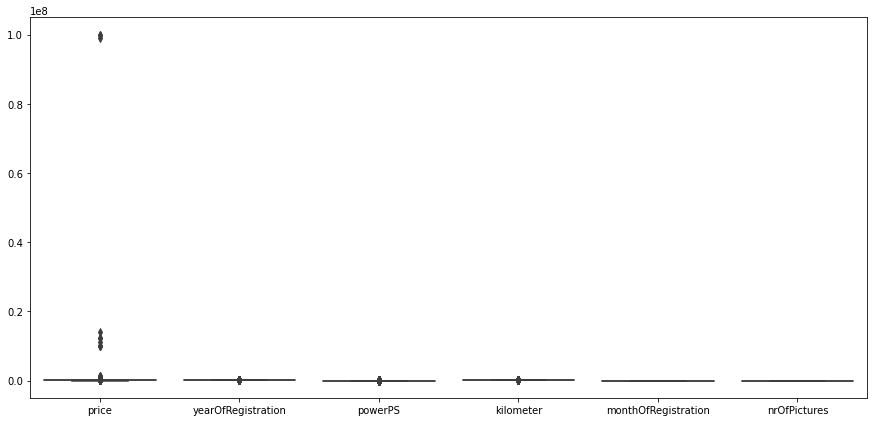

In [143]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[numerical_columns])
plt.show()

In [144]:
# Функция sklearn для нормализации данных
scaler = MinMaxScaler()
# Нормализируем
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures
count,260952.000000,260952.000000,260952.000000,260952.000000,260952.000000,260952.0
mean,0.000082,0.863977,0.006317,0.821096,0.515214,0.0
std,0.003433,0.060298,0.007264,0.274813,0.289281,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000015,0.824074,0.003900,0.655172,0.250000,0.0
50%,0.000039,0.870370,0.005800,1.000000,0.500000,0.0
75%,0.000086,0.907407,0.007500,1.000000,0.750000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


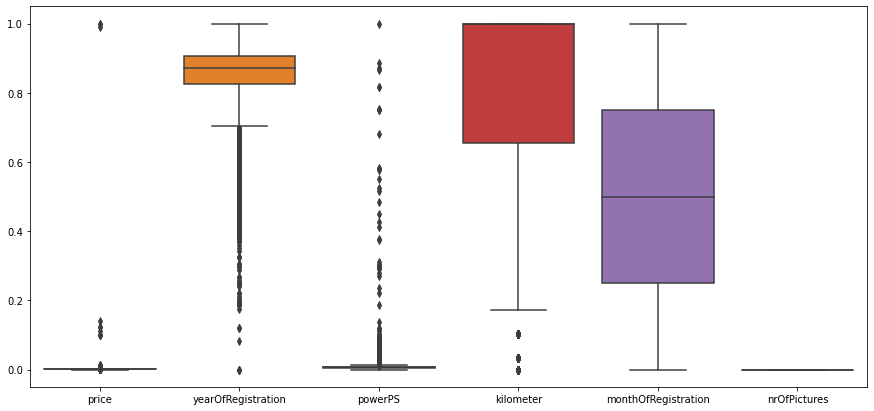

In [145]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[numerical_columns])
plt.show()

#### 4) Выполните замену категориальных признаков; выберите и обоснуйте способ замены;¶

In [146]:
for i in categorial_columns:
    print(i,': ', df[i].unique())

seller :  ['privat' 'gewerblich']
abtest :  ['test' 'control']
vehicleType :  ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']
gearbox :  ['manuell' 'automatik']
fuelType :  ['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
brand :  ['volkswagen' 'skoda' 'bmw' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'seat' 'honda' 'fiat' 'mini' 'opel' 'smart' 'audi'
 'alfa_romeo' 'subaru' 'mitsubishi' 'hyundai' 'volvo' 'lancia' 'porsche'
 'citroen' 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki' 'daihatsu'
 'chrysler' 'jaguar' 'rover' 'jeep' 'saab' 'daewoo' 'land_rover' 'trabant'
 'lada']
notRepairedDamage :  ['nein' 'ja']


In [147]:
#  Бинарные признаки
binary_columns = [i for i in categorial_columns if len(df[i].unique()) == 2] 
#  Не бинарные признаки
nonbinary_columns = [i for i in categorial_columns if len(df[i].unique()) > 2] 

# Бинарные признаки заменяются на 0 и 1
for col in binary_columns:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
# Для не бинарных признаков применяется dummy-кодирование
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
df.drop(nonbinary_columns, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df] , axis=1) # Соединение таблиц

print(df.shape)
df.head()

(260952, 64)


,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,nrOfPictures
3,0,0,0,0,1,0,0,0,0,1,...,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0,0.0
5,0,0,0,0,0,0,1,0,0,1,...,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1,0.0
6,0,0,1,0,0,0,0,0,0,1,...,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0,0.0
7,0,0,0,0,0,0,1,0,0,1,...,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0,0.0


#### 5. Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

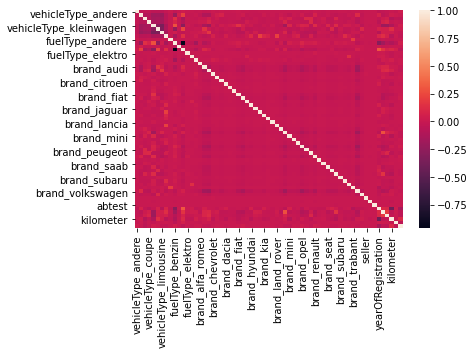

In [149]:
corr_matrix = df.drop(['nrOfPictures'], axis=1).corr()
sns.heatmap(corr_matrix)

#### 6. Заполните пропущенные значения в данных

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   vehicleType_andere      260952 non-null  uint8  
 1   vehicleType_bus         260952 non-null  uint8  
 2   vehicleType_cabrio      260952 non-null  uint8  
 3   vehicleType_coupe       260952 non-null  uint8  
 4   vehicleType_kleinwagen  260952 non-null  uint8  
 5   vehicleType_kombi       260952 non-null  uint8  
 6   vehicleType_limousine   260952 non-null  uint8  
 7   vehicleType_suv         260952 non-null  uint8  
 8   fuelType_andere         260952 non-null  uint8  
 9   fuelType_benzin         260952 non-null  uint8  
 10  fuelType_cng            260952 non-null  uint8  
 11  fuelType_diesel         260952 non-null  uint8  
 12  fuelType_elektro        260952 non-null  uint8  
 13  fuelType_hybrid         260952 non-null  uint8  
 14  fuelType_lpg        

#### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [66]:
from  sklearn import linear_model

In [72]:
# Линейная регрессия - без регуляризаторов
X, y = df.drop(['price'], axis=1), df['price']
# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
reg = linear_model.LinearRegression()
# Выполняем обучение модели
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)
# Выводим разницу между реальным значением и предсказанным
print(pred_reg[:15] - y_test[:15])

173420   -0.000007
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000009
304305    0.000055
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64


In [73]:
# Коэфф-ты корреляции
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.014861803399002234 p_value: 3.204260517573875e-05
Spearmen correlation: 0.6746882249078172 p_value: 0.0


In [74]:
# Линейная регрессия - RIDGE
import warnings
warnings.filterwarnings("ignore")
reg = linear_model.Ridge()
params = {'alpha': np.arange(0, 1, 0.05)}
reg_grid = GridSearchCV(reg, params)
# Выполняем обучение модели
reg_grid.fit(X_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha: ', end = '')
print('%.2f' % best_alpha)

best alpha: 0.95


In [75]:
reg = linear_model.Ridge(alpha=best_alpha)
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)
# Выводим разницу между реальным значением и предсказанным.
print(pred_reg[:15] - y_test[:15])

173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000009
304305    0.000055
183986   -0.000009
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000034
Name: price, dtype: float64


In [76]:
# Коэфф-ты корреляции
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.014869367493920514 p_value: 3.174704534043214e-05
Spearmen correlation: 0.6737630989773014 p_value: 0.0
